# Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load the Dataset

In [2]:
data = pd.read_csv(r'C:\Users\lenovo\Desktop\UM PROJECTS\netflix1.csv')

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB
None


In [3]:
data.head(5)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


# Data Cleaning

In [4]:
# Check for missing values
print(data.isnull().sum())

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


In [5]:
# Drop duplicates if any
data.drop_duplicates(inplace=True)

In [6]:
# Convert 'date_added' to datetime
data['date_added'] = pd.to_datetime(data['date_added'])

In [7]:
# Show data types to confirm changes
print(data.dtypes)

show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object


# Exploratory Data Analysis (EDA)

- Content Type Distribution (Movies vs. TV Shows)

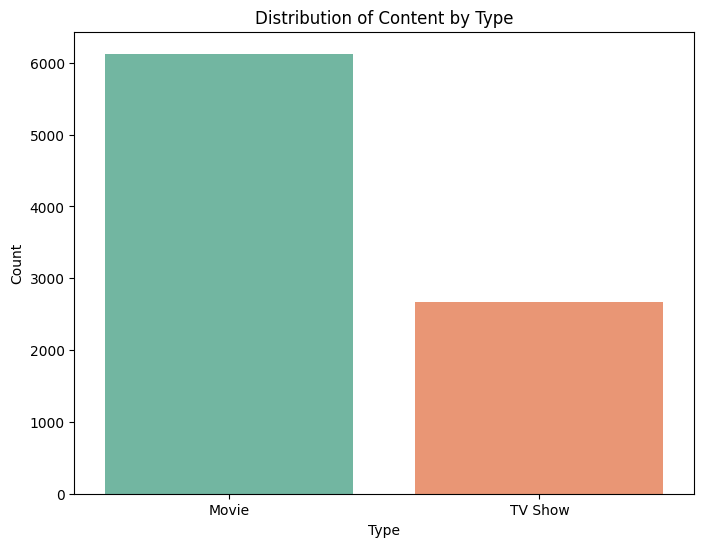

In [8]:
# Count the number of Movies and TV Shows
type_counts = data['type'].value_counts()

# Plot the distribution with hue
plt.figure(figsize=(8, 6))
sns.barplot(x=type_counts.index, y=type_counts.values, hue=type_counts.index, palette='Set2')
plt.title('Distribution of Content by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

- Most Common Genres

In [9]:
# Split the 'listed_in' column and count genres
data['genres'] = data['listed_in'].apply(lambda x: x.split(','))
all_genres = sum(data['genres'], [])
genre_counts = pd.Series(all_genres).value_counts().head(10)

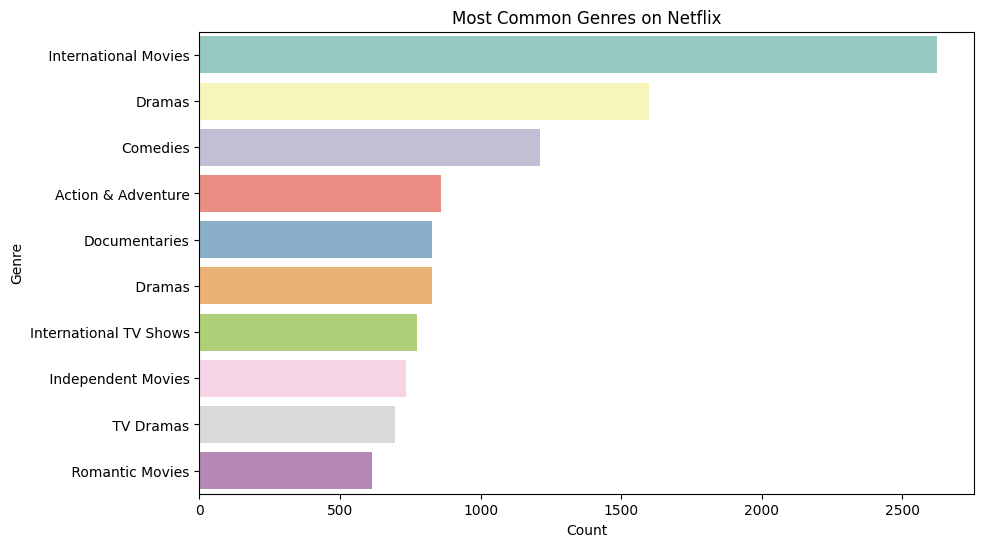

In [10]:
# Plot the most common genres
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, hue=genre_counts.index, palette='Set3', legend=False)
plt.title('Most Common Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

- Content Added Over Time

In [11]:
# Extract year and month from 'date_added'
data['year_added'] = pd.to_datetime(data['date_added']).dt.year
data['month_added'] = pd.to_datetime(data['date_added']).dt.month

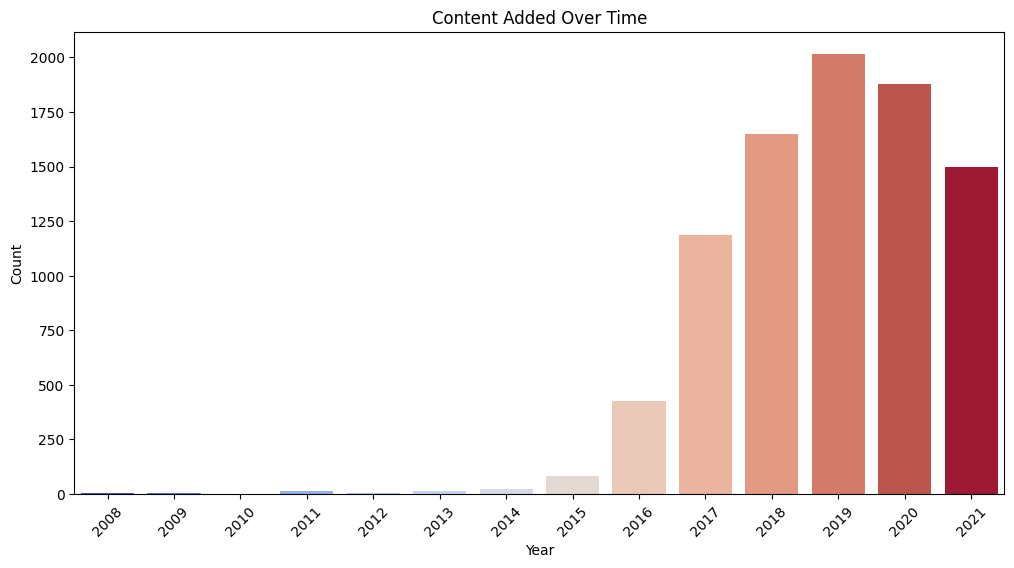

In [12]:
# Plot content added over the years
plt.figure(figsize=(12, 6))
sns.countplot(x='year_added', data=data, hue='year_added', palette='coolwarm', legend=False)
plt.title('Content Added Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

- Top 10 Directors with the Most Titles

In [13]:
# Count titles by director
top_directors = data['director'].value_counts().head(10)

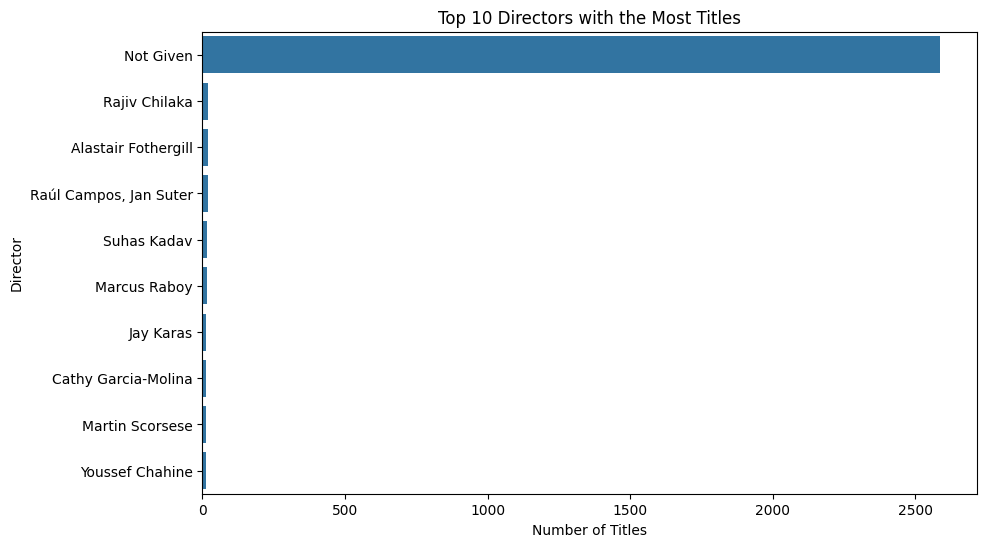

In [14]:
# Plot top directors
plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors.values, y=top_directors.index)  # Removed 'palette' to avoid FutureWarning
plt.title('Top 10 Directors with the Most Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

- Word Cloud of Movie Titles

In [15]:
# Generate word cloud
movie_titles = data[data['type'] == 'Movie']['title']
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(movie_titles))

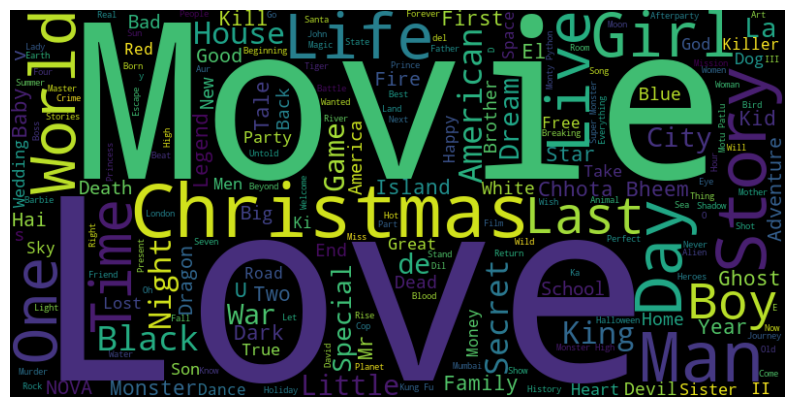

In [16]:
# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Feature Engineering

- Counting the Number of Genres per Movie

In [17]:
# Split the 'listed_in' column (which contains genres) and count the number of genres per movie
data['genres'] = data['listed_in'].apply(lambda x: x.split(','))
data['genre_count'] = data['genres'].apply(lambda x: len(x))

# Show the first few rows to confirm the new feature
print(data[['title', 'genre_count']].head())

                              title  genre_count
0              Dick Johnson Is Dead            1
1                         Ganglands            3
2                     Midnight Mass            3
3  Confessions of an Invisible Girl            2
4                           Sankofa            3


-  Extracting Duration in Minutes

In [45]:
# If the 'duration' column exists and contains values like '90 min'
data['duration_minutes'] = data['duration'].str.extract('(\d+)').astype(float)

# Show the first few rows to confirm the new feature
print(data[['title', 'duration', 'duration_minutes']].head())

                              title  duration  duration_minutes
0              Dick Johnson Is Dead    90 min              90.0
1                         Ganglands  1 Season               1.0
2                     Midnight Mass  1 Season               1.0
3  Confessions of an Invisible Girl    91 min              91.0
4                           Sankofa   125 min             125.0


In [41]:
# Add a release decade column
data['release_decade'] = (data['release_year'] // 10) * 10

# Display a preview of the enhanced dataset
print(data[['release_decade']].head())

   release_decade
0            2020
1            2020
2            2020
3            2020
4            1990


# Machine Learning

- Building a Recommendation System

In [19]:
# Content based recommendation system based on the genres of movies:
# 1: Vectorize the genres for each movie using TF-IDF 
# (Term Frequency-Inverse Document Frequency).
# 2: Calculate similarity scores (e.g., cosine similarity) between 
# movies based on their genres.

In [20]:
print(data.columns)

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'genres',
       'year_added', 'month_added', 'genre_count', 'duration_minutes'],
      dtype='object')


In [21]:
# Combine title and genre into a single text column for recommendation
data['combined'] = data['title'] + " " + data['listed_in']

# Create a cleaned version of the title column for case-insensitive matching
data['title_clean'] = data['title'].str.strip().str.lower()

# Vectorize the combined text (title + genre)
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_features=5000)
tfidf_matrix = tfidf.fit_transform(data['combined'])

# Calculate cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Define the recommendation function
def recommend_movie(title, cosine_sim=cosine_sim):
    title_clean = title.strip().lower()
    
    # Check if the title exists in the cleaned data
    if title_clean not in data['title_clean'].values:
        return f"Movie titled '{title}' not found in the dataset."

    # Get index of the movie that matches the title
    idx = data[data['title_clean'] == title_clean].index[0]

    # Get pairwise similarity scores for all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get top 5 similar movies
    sim_scores = sim_scores[1:6]
    movie_indices = [i[0] for i in sim_scores]     
    return data['title'].iloc[movie_indices]

# Example usage
print(recommend_movie("Confessions of an Invisible Girl"))

488             My Girl 2
829           Skater Girl
2093    What a Girl Wants
2576           Santa Girl
2679            Tall Girl
Name: title, dtype: object


- Building a Trend Prediction Model

In [22]:
# We  can use machine learning models like Linear Regression to predict the number 
# of movies added in future years.

In [23]:
#1 - Prepare the Data for Modeling
data_years = data['year_added'].value_counts().sort_index().reset_index()
data_years.columns = ['year', 'count']

In [24]:
# 2 - Split Data into Training(80%) and Testing(20%)
from sklearn.model_selection import train_test_split
X = data_years['year'].values.reshape(-1, 1)
y = data_years['count'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# 3 - Train a Linear Regression Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
# 4 - Predict Future Trends
future_years = [[2025], [2026], [2027]]
predictions = model.predict(future_years)
print(f"Predictions for future years: {predictions}")

Predictions for future years: [2280.2279496  2448.29266896 2616.35738832]


# Advanced Visualization:

- Interactive Plots with Plotly 

In [27]:
# We can use Plotly to make interactive plots.

In [28]:
import plotly.io as pio
pio.renderers.default = 'browser'

In [29]:
# Displaying the code's ouput in Browser:

In [30]:
import plotly.express as px

# Verify Data
print(data_years.head(18))

# Create an interactive bar plot
fig = px.bar(
    data_frame=data_years,
    x='year',
    y='count',
    title="Content Added Over Time",
    labels={'year': 'Year', 'count': 'Count'},
    color='count',  # Add color for better visualization
    text='count'    # Display count values on bars
)

# Customize layout for advanced visualization
fig.update_layout(
    xaxis_tickangle=-45,      # Tilt x-axis labels
    title_font=dict(size=24), # Adjust title font size
    xaxis_title_font=dict(size=18),
    yaxis_title_font=dict(size=18),
    plot_bgcolor='rgba(0,0,0,0)', # Set background to transparent
    paper_bgcolor='rgba(0,0,0,0)',
)

# Show the plot
fig.show()

    year  count
0   2008      2
1   2009      2
2   2010      1
3   2011     13
4   2012      3
5   2013     11
6   2014     24
7   2015     82
8   2016    426
9   2017   1185
10  2018   1648
11  2019   2016
12  2020   1879
13  2021   1498


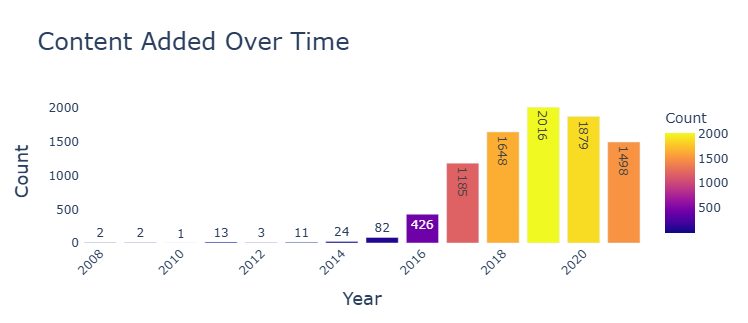

In [31]:
# The browser graph looks like this:
from IPython.display import Image, display

# Provide the path to your image
image = r"C:\Users\lenovo\Desktop\UM PROJECTS\Browser Image.png"

# Display the image
display(Image(filename=image))

In [32]:
import plotly.io as pio
pio.renderers.default = 'notebook'

In [33]:
# Displaying the code's ouput in Notebook:

    year  count
0   2008      2
1   2009      2
2   2010      1
3   2011     13
4   2012      3
5   2013     11
6   2014     24
7   2015     82
8   2016    426
9   2017   1185
10  2018   1648
11  2019   2016
12  2020   1879
13  2021   1498


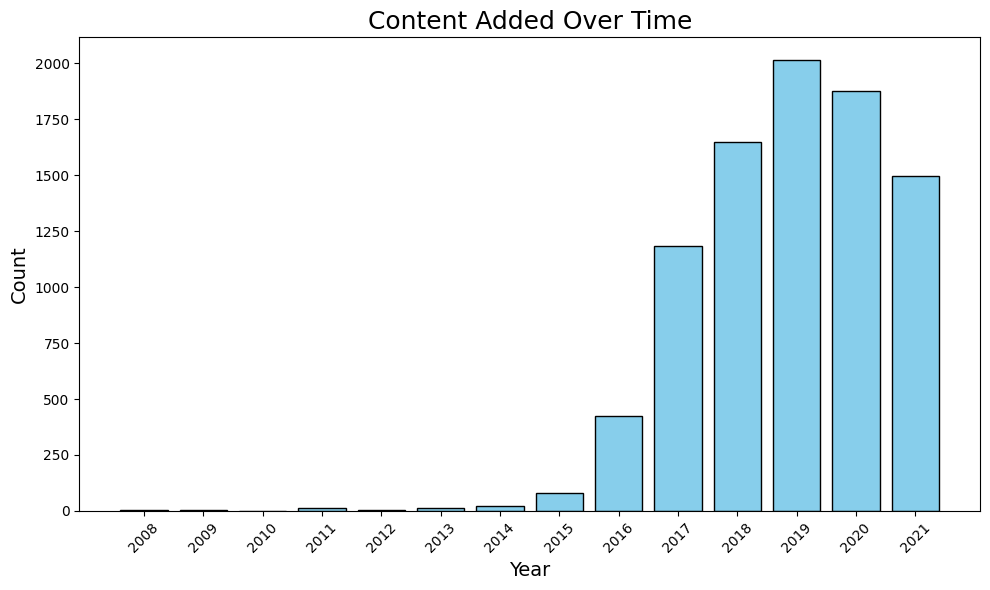

In [34]:
import matplotlib.pyplot as plt

# Verify Data
print(data_years.head(18))

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(data_years['year'], data_years['count'], color='skyblue', edgecolor='black')

# Customize the chart
plt.title("Content Added Over Time", fontsize=18)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(data_years['year'], rotation=45)

# Display the chart
plt.tight_layout()
plt.show()

- Interactive Bar Chart for Top Genres

In [52]:
import plotly.io as pio
pio.renderers.default = 'notebook'

In [47]:
import plotly.express as px

# Top genres
top_genres = genre_counts.head(10)
fig = px.bar(top_genres, x=top_genres.values, y=top_genres.index,
             labels={'x': 'Count', 'y': 'Genres'}, 
             title='Top 10 Genres on Netflix', orientation='h')
fig.show()

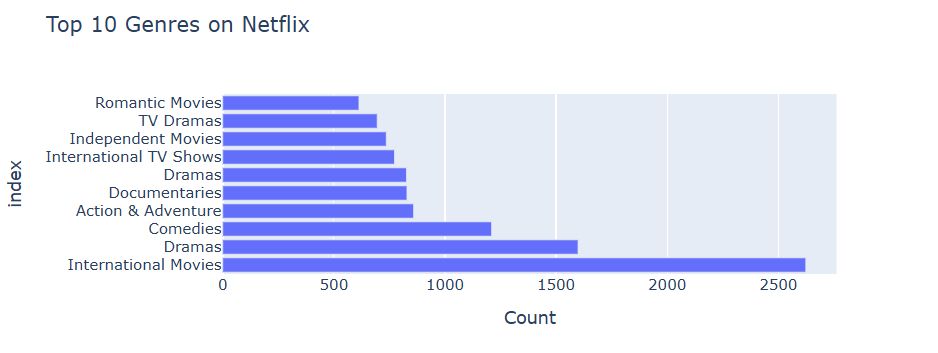

In [53]:
# The browser graph looks like this:
from IPython.display import Image, display

# Provide the path to your image
image = r"C:\Users\lenovo\Desktop\UM PROJECTS\Top 10 Genres on Netflix.png"

# Display the image
display(Image(filename=image))

- Interactive Pie Chart for Content Distribution

In [48]:
fig = px.pie(data, names='type', title='Content Distribution on Netflix')
fig.show()

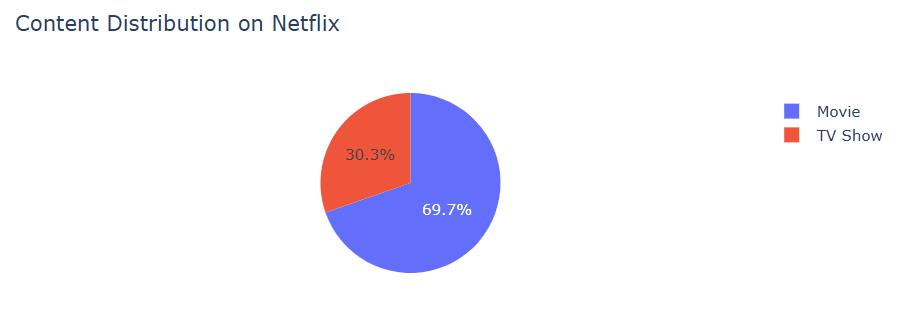

In [54]:
# The browser graph looks like this:
from IPython.display import Image, display

# Provide the path to your image
image = r"C:\Users\lenovo\Desktop\UM PROJECTS\Content Distribution on Netflix.png"

# Display the image
display(Image(filename=image))

- Dashboards with Dash

In [40]:
import plotly.io as pio
from dash import dcc, html  
import plotly.express as px
import dash

# Set the default renderer to open in a browser
pio.renderers.default = 'browser'

# Create a Dash app
app = dash.Dash()

# Prepare your visualization
fig = px.bar(data_frame=data_years, x='year', y='count', title="Content Added Over Time")

# Define the layout of the app
app.layout = html.Div([
    html.H1("Netflix Data Analysis Dashboard", style={'color': 'white'}),  # Set title color to white
    dcc.Graph(figure=fig),
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=False)